In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.metrics import classification_report

## epiTCR

In [2]:
test01 = pd.read_csv("../../data/split-data/without-mhc/test/test01.csv")
test02 = pd.read_csv("../../data/split-data/without-mhc/test/test02.csv")
test03 = pd.read_csv("../../data/split-data/without-mhc/test/test03.csv")
test04 = pd.read_csv("../../data/split-data/without-mhc/test/test04.csv")
test05 = pd.read_csv("../../data/split-data/without-mhc/test/test05.csv")
test06 = pd.read_csv("../../data/split-data/without-mhc/test/test06.csv")
test07 = pd.read_csv("../../data/split-data/without-mhc/test/test07.csv")
test08 = pd.read_csv("../../data/split-data/without-mhc/test/test08.csv")
test09 = pd.read_csv("../../data/split-data/without-mhc/test/test09.csv")
test10 = pd.read_csv("../../data/split-data/without-mhc/test/test10.csv")
test11 = pd.read_csv("../../data/split-data/without-mhc/test/test11.csv")
test12 = pd.read_csv("../../data/split-data/without-mhc/test/test12.csv")
test13 = pd.read_csv("../../data/split-data/without-mhc/test/test13.csv")
test14 = pd.read_csv("../../data/split-data/without-mhc/test/test14.csv")
test15 = pd.read_csv("../../data/split-data/without-mhc/test/test15.csv")

In [3]:
test01_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test01.csv")
test02_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test02.csv")
test03_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test03.csv")
test04_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test04.csv")
test05_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test05.csv")
test06_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test06.csv")
test07_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test07.csv")
test08_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test08.csv")
test09_mhc = pd.read_csv("../../data/split-data/with-mhc/test/test09.csv")

In [4]:
data_test = pd.concat([test01,test02,test03,test04,test05,test06,test07,
                       test08,test09,test10,test11,test12,test13,test14,test15], axis=0)
data_test = data_test.reset_index(drop=True)
data_test

,CDR3b,epitope,binder
0,ASSVDGGRNNEQF,VFLVLLPLV,1
1,ASSPSISYRETQY,YTMADLVYAL,1
2,SVGQGPYEQY,YVLDHLIVV,1
3,ASSLFPGTPKNIQY,TLIGDCATV,1
4,ASSLAPGVSQTQY,TTDPSFLGRY,1
...,...,...,...
1098807,ASSLGSGGEVSYNEQF,RLRAEAQVK,0
1098808,ASRDGTEAF,STEGGGLAY,0
1098809,ASSQDSGGANEQF,CLLGTYTQDV,0
1098810,ASSYSAGSTEAF,KVAELVHFL,0


In [5]:
data_test_mhc = pd.concat([test01_mhc,test02_mhc,test03_mhc,test04_mhc,test05_mhc,
                       test06_mhc,test07_mhc,test08_mhc,test09_mhc], axis=0)
data_test_mhc = data_test_mhc.reset_index(drop=True)
data_test_mhc

,CDR3b,epitope,MHC,binder
0,ASSSGTGDQPQH,LLMGTLGIVC,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,0
1,ASSSELGAEDNNEQF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,0
2,AWTPDRVWTEAF,YLNDHLEPWI,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,0
3,ASSGKTVMNTEAF,RAKFKQLL,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRF...,0
4,ASSLRTSGIYEQY,VTEHDTLLY,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,0
...,...,...,...,...
657762,SATGFPDSPLH,LPRRSGAAGA,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,1
657763,ASSTYHRTHYNEQF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1
657764,ASSLRGFSTDTQY,LPRRSGAAGA,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,1
657765,ASSLYSATGELF,GILGFVFTL,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1


In [6]:
data_test_01 = data_test.sample(n=10000, random_state=42)
data_test_01 = data_test_01.reset_index(drop=True)

data_test_mhc_01 = data_test_mhc.sample(n=10000, random_state=42)
data_test_mhc_01 = data_test_mhc_01.reset_index(drop=True)

data_test_02 = data_test.sample(n=50000, random_state=42)
data_test_02 = data_test_02.reset_index(drop=True)

data_test_mhc_02 = data_test_mhc.sample(n=50000, random_state=42)
data_test_mhc_02 = data_test_mhc_02.reset_index(drop=True)

data_test_03 = data_test.sample(n=200000, random_state=42)
data_test_03 = data_test_03.reset_index(drop=True)

data_test_mhc_03 = data_test_mhc.sample(n=200000, random_state=42)
data_test_mhc_03 = data_test_mhc_03.reset_index(drop=True)

data_test_04 = data_test.sample(n=500000, random_state=42)
data_test_04 = data_test_04.reset_index(drop=True)

data_test_mhc_04 = data_test_mhc.sample(n=500000, random_state=42)
data_test_mhc_04 = data_test_mhc_04.reset_index(drop=True)

data_test_05 = data_test.sample(n=1000000, random_state=42)
data_test_05 = data_test_05.reset_index(drop=True)

In [7]:
data_test_01.to_csv("../../data/random-sample-data/epitcr/without-mhc/data_test_01.csv", index=False)
data_test_02.to_csv("../../data/random-sample-data/epitcr/without-mhc/data_test_02.csv", index=False)
data_test_03.to_csv("../../data/random-sample-data/epitcr/without-mhc/data_test_03.csv", index=False)
data_test_04.to_csv("../../data/random-sample-data/epitcr/without-mhc/data_test_04.csv", index=False)
data_test_05.to_csv("../../data/random-sample-data/epitcr/without-mhc/data_test_05.csv", index=False)

In [8]:
data_test_mhc_01.to_csv('../../data/random-sample-data/epitcr/with-mhc/data_test_10000.csv', index=False)
data_test_mhc_02.to_csv('../../data/random-sample-data/epitcr/with-mhc/data_test_50000.csv', index=False)
data_test_mhc_03.to_csv('../../data/random-sample-data/epitcr/with-mhc/data_test_200000.csv', index=False)
data_test_mhc_04.to_csv('../../data/random-sample-data/epitcr/with-mhc/data_test_500000.csv', index=False)

## pMTnet

In [14]:
test01_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test01.csv")
test02_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test02.csv")
test03_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test03.csv")
test04_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test04.csv")
test05_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test05.csv")
test06_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test06.csv")
test07_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test07.csv")
test08_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test08.csv")
test09_pmtnet = pd.read_csv("../../data/data-for-runtime/pmtnet/test09.csv")

In [20]:
y_data_pmtnet01 = test01_pmtnet.iloc[:, 3:]
y_data_pmtnet02 = test02_pmtnet.iloc[:, 3:]
y_data_pmtnet03 = test03_pmtnet.iloc[:, 3:]
y_data_pmtnet04 = test04_pmtnet.iloc[:, 3:]
y_data_pmtnet05 = test05_pmtnet.iloc[:, 3:]
y_data_pmtnet06 = test06_pmtnet.iloc[:, 3:]
y_data_pmtnet07 = test07_pmtnet.iloc[:, 3:]
y_data_pmtnet08 = test08_pmtnet.iloc[:, 3:]
y_data_pmtnet09 = test09_pmtnet.iloc[:, 3:]

In [16]:
data_test_pmtnet01 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test01.csv")
data_test_pmtnet02 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test02.csv")
data_test_pmtnet03 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test03.csv")
data_test_pmtnet04 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test04.csv")
data_test_pmtnet05 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test05.csv")
data_test_pmtnet06 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test06.csv")
data_test_pmtnet07 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test07.csv")
data_test_pmtnet08 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test08.csv")
data_test_pmtnet09 = pd.read_csv("../../data/data-for-runtime/pmtnet/normalize_data/test09.csv")

In [21]:
test_pMTnet01 = pd.concat([data_test_pmtnet01, y_data_pmtnet01], axis=1)
test_pMTnet02 = pd.concat([data_test_pmtnet02, y_data_pmtnet02], axis=1)
test_pMTnet03 = pd.concat([data_test_pmtnet03, y_data_pmtnet03], axis=1)
test_pMTnet04 = pd.concat([data_test_pmtnet04, y_data_pmtnet04], axis=1)
test_pMTnet05 = pd.concat([data_test_pmtnet05, y_data_pmtnet05], axis=1)
test_pMTnet06 = pd.concat([data_test_pmtnet06, y_data_pmtnet06], axis=1)
test_pMTnet07 = pd.concat([data_test_pmtnet07, y_data_pmtnet07], axis=1)
test_pMTnet08 = pd.concat([data_test_pmtnet08, y_data_pmtnet08], axis=1)
test_pMTnet09 = pd.concat([data_test_pmtnet09, y_data_pmtnet09], axis=1)

In [22]:
data_test_pmtnet = pd.concat([test_pMTnet01,test_pMTnet02,test_pMTnet03,test_pMTnet04,
                           test_pMTnet05,test_pMTnet06,test_pMTnet07,test_pMTnet08,test_pMTnet09], axis=0)
data_test_pmtnet = data_test_pmtnet.reset_index(drop=True)
data_test_pmtnet

,CDR3,Antigen,HLA,binder
0,ASSAPGTTNTEAF,RMFPNAPYL,A*02:01,0
1,SARAPGLAGVWETQY,SLLMWITQV,A*02:01,0
2,ASTGRGAQETQY,RPHERNGFTVL,B*07:02,0
3,ASSPPGASGNTIY,AYSSAGASI,A*24:02,0
4,ASSQERGNYGYT,ELRRKMMYM,B*08:01,0
...,...,...,...,...
669092,ASSRLAGGTDTQY,QIKVRVDMV,B*08:01,1
669093,AWSVPGLGQPQH,ELAGIGILTV,A*02:01,1
669094,ATGQDRAYEQY,LLWNGPMAV,A*02:01,1
669095,ASSQGTSNNEQF,KLGGALQAK,A*03:01,1


In [23]:
data_test_pmtnet_01 = data_test_pmtnet.sample(n=10000, random_state=42)
data_test_pmtnet_01 = data_test_pmtnet_01.reset_index(drop=True)

data_test_pmtnet_02 = data_test_pmtnet.sample(n=50000, random_state=42)
data_test_pmtnet_02 = data_test_pmtnet_02.reset_index(drop=True)

data_test_pmtnet_03 = data_test_pmtnet.sample(n=200000, random_state=42)
data_test_pmtnet_03 = data_test_pmtnet_03.reset_index(drop=True)

data_test_pmtnet_04 = data_test_pmtnet.sample(n=500000, random_state=42)
data_test_pmtnet_04 = data_test_pmtnet_04.reset_index(drop=True)


In [24]:
X_data_test_pmtnet_01 = data_test_pmtnet_01.iloc[:, :3]
X_data_test_pmtnet_02 = data_test_pmtnet_02.iloc[:, :3]
X_data_test_pmtnet_03 = data_test_pmtnet_03.iloc[:, :3]
X_data_test_pmtnet_04 = data_test_pmtnet_04.iloc[:, :3]


In [26]:
X_data_test_pmtnet_01.to_csv('../../data/random-sample-data/pmtnet/data_test_pmtnet_01.csv', index=False)
X_data_test_pmtnet_02.to_csv('../../data/random-sample-data/pmtnet/data_test_pmtnet_02.csv', index=False)
X_data_test_pmtnet_03.to_csv('../../data/random-sample-data/pmtnet/data_test_pmtnet_03.csv', index=False)
X_data_test_pmtnet_04.to_csv('../../data/random-sample-data/pmtnet/data_test_pmtnet_04.csv', index=False)

## Imrex

In [29]:
imrex_test01 = pd.read_csv("../../data/data-for-runtime/imrex/ptest01.csv")
imrex_test02 = pd.read_csv("../../data/data-for-runtime/imrex/ptest02.csv")
imrex_test03 = pd.read_csv("../../data/data-for-runtime/imrex/ptest03.csv")
imrex_test04 = pd.read_csv("../../data/data-for-runtime/imrex/ptest04.csv")
imrex_test05 = pd.read_csv("../../data/data-for-runtime/imrex/ptest05.csv")
imrex_test06 = pd.read_csv("../../data/data-for-runtime/imrex/ptest06.csv")
imrex_test07 = pd.read_csv("../../data/data-for-runtime/imrex/ptest07.csv")
imrex_test08 = pd.read_csv("../../data/data-for-runtime/imrex/ptest08.csv")
imrex_test09 = pd.read_csv("../../data/data-for-runtime/imrex/ptest09.csv")
imrex_test10 = pd.read_csv("../../data/data-for-runtime/imrex/ptest10.csv")
imrex_test11 = pd.read_csv("../../data/data-for-runtime/imrex/ptest11.csv")
imrex_test12 = pd.read_csv("../../data/data-for-runtime/imrex/ptest12.csv")
imrex_test13 = pd.read_csv("../../data/data-for-runtime/imrex/ptest13.csv")
imrex_test14 = pd.read_csv("../../data/data-for-runtime/imrex/ptest14.csv")
imrex_test15 = pd.read_csv("../../data/data-for-runtime/imrex/ptest15.csv")

In [30]:
imrex_data_test = pd.concat([imrex_test01,imrex_test02,imrex_test03,imrex_test04,
                             imrex_test05,imrex_test06,imrex_test07,imrex_test08,
                             imrex_test09,imrex_test10,imrex_test11,imrex_test12,
                             imrex_test13,imrex_test14,imrex_test15], axis=0)
imrex_data_test = imrex_data_test.reset_index(drop=True)
imrex_data_test

,cdr3;antigen.epitope
0,ASSVDGGRNNEQF;VFLVLLPLV
1,ASSPSISYRETQY;YTMADLVYAL
2,SVGQGPYEQY;YVLDHLIVV
3,ASSLFPGTPKNIQY;TLIGDCATV
4,ASSLAPGVSQTQY;TTDPSFLGRY
...,...
1098807,ASSLGSGGEVSYNEQF;RLRAEAQVK
1098808,ASRDGTEAF;STEGGGLAY
1098809,ASSQDSGGANEQF;CLLGTYTQDV
1098810,ASSYSAGSTEAF;KVAELVHFL


In [31]:
imrex_data_test_01 = imrex_data_test.sample(n=10000, random_state=42)
imrex_data_test_01 = imrex_data_test_01.reset_index(drop=True)

imrex_data_test_02 = imrex_data_test.sample(n=50000, random_state=42)
imrex_data_test_02 = imrex_data_test_02.reset_index(drop=True)

imrex_data_test_03 = imrex_data_test.sample(n=200000, random_state=42)
imrex_data_test_03 = imrex_data_test_03.reset_index(drop=True)

imrex_data_test_04 = imrex_data_test.sample(n=500000, random_state=42)
imrex_data_test_04 = imrex_data_test_04.reset_index(drop=True)

imrex_data_test_05 = imrex_data_test.sample(n=1000000, random_state=42)
imrex_data_test_05 = imrex_data_test_05.reset_index(drop=True)

In [33]:
imrex_data_test_01.to_csv('../../data/random-sample-data/imrex/data_test_imrex_10000.csv', index=False)
imrex_data_test_02.to_csv('../../data/random-sample-data/imrex/data_test_imrex_50000.csv', index=False)
imrex_data_test_03.to_csv('../../data/random-sample-data/imrex/data_test_imrex_200000.csv', index=False)
imrex_data_test_04.to_csv('../../data/random-sample-data/imrex/data_test_imrex_500000.csv', index=False)
imrex_data_test_05.to_csv('../../data/random-sample-data/imrex/data_test_imrex_1000000.csv', index=False)

## NetTCR

In [34]:
nettcr_test01 = pd.read_csv("../../data/data-for-runtime/nettcr/test01.csv")
nettcr_test02 = pd.read_csv("../../data/data-for-runtime/nettcr/test02.csv")
nettcr_test03 = pd.read_csv("../../data/data-for-runtime/nettcr/test03.csv")
nettcr_test04 = pd.read_csv("../../data/data-for-runtime/nettcr/test04.csv")
nettcr_test05 = pd.read_csv("../../data/data-for-runtime/nettcr/test05.csv")
nettcr_test06 = pd.read_csv("../../data/data-for-runtime/nettcr/test06.csv")
nettcr_test07 = pd.read_csv("../../data/data-for-runtime/nettcr/test07.csv")
nettcr_test08 = pd.read_csv("../../data/data-for-runtime/nettcr/test08.csv")
nettcr_test09 = pd.read_csv("../../data/data-for-runtime/nettcr/test09.csv")
nettcr_test10 = pd.read_csv("../../data/data-for-runtime/nettcr/test10.csv")
nettcr_test11 = pd.read_csv("../../data/data-for-runtime/nettcr/test11.csv")
nettcr_test12 = pd.read_csv("../../data/data-for-runtime/nettcr/test12.csv")
nettcr_test13 = pd.read_csv("../../data/data-for-runtime/nettcr/test13.csv")
nettcr_test14 = pd.read_csv("../../data/data-for-runtime/nettcr/test14.csv")
nettcr_test15 = pd.read_csv("../../data/data-for-runtime/nettcr/test15.csv")

In [35]:
nettcr_test02.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test03.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test04.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test05.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test06.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test07.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test08.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test09.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test10.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test11.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test12.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test13.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test14.rename(columns = {'epitope':'peptide'}, inplace = True)
nettcr_test15.rename(columns = {'epitope':'peptide'}, inplace = True)

nettcr_test02 = nettcr_test02.loc[ :, ["CDR3b","peptide"]]
nettcr_test03 = nettcr_test03.loc[ :, ["CDR3b","peptide"]]
nettcr_test04 = nettcr_test04.loc[ :, ["CDR3b","peptide"]]
nettcr_test05 = nettcr_test05.loc[ :, ["CDR3b","peptide"]]
nettcr_test06 = nettcr_test06.loc[ :, ["CDR3b","peptide"]]
nettcr_test07 = nettcr_test07.loc[ :, ["CDR3b","peptide"]]
nettcr_test08 = nettcr_test08.loc[ :, ["CDR3b","peptide"]]
nettcr_test09 = nettcr_test09.loc[ :, ["CDR3b","peptide"]]
nettcr_test10 = nettcr_test10.loc[ :, ["CDR3b","peptide"]]
nettcr_test11 = nettcr_test11.loc[ :, ["CDR3b","peptide"]]
nettcr_test12 = nettcr_test12.loc[ :, ["CDR3b","peptide"]]
nettcr_test13 = nettcr_test13.loc[ :, ["CDR3b","peptide"]]
nettcr_test14 = nettcr_test14.loc[ :, ["CDR3b","peptide"]]
nettcr_test15 = nettcr_test15.loc[ :, ["CDR3b","peptide"]]

In [36]:
nettcr_data_test = pd.concat([nettcr_test01,nettcr_test02,nettcr_test03,
                              nettcr_test04,nettcr_test05,nettcr_test06,
                              nettcr_test07,nettcr_test08,nettcr_test09,
                              nettcr_test10,nettcr_test11,nettcr_test12,
                              nettcr_test13,nettcr_test14,nettcr_test15], axis=0)
nettcr_data_test = nettcr_data_test.reset_index(drop=True)
nettcr_data_test

,CDR3b,peptide
0,ASSVDGGRNNEQF,VFLVLLPLV
1,ASSPSISYRETQY,YTMADLVYAL
2,SVGQGPYEQY,YVLDHLIVV
3,ASSLFPGTPKNIQY,TLIGDCATV
4,ASSLAPGVSQTQY,TTDPSFLGRY
...,...,...
1098807,ASSLGSGGEVSYNEQF,RLRAEAQVK
1098808,ASRDGTEAF,STEGGGLAY
1098809,ASSQDSGGANEQF,CLLGTYTQDV
1098810,ASSYSAGSTEAF,KVAELVHFL


In [37]:
nettcr_data_test_01 = nettcr_data_test.sample(n=10000, random_state=42)
nettcr_data_test_01 = nettcr_data_test_01.reset_index(drop=True)

nettcr_data_test_02 = nettcr_data_test.sample(n=50000, random_state=42)
nettcr_data_test_02 = nettcr_data_test_02.reset_index(drop=True)

nettcr_data_test_03 = nettcr_data_test.sample(n=200000, random_state=42)
nettcr_data_test_03 = nettcr_data_test_03.reset_index(drop=True)

nettcr_data_test_04 = nettcr_data_test.sample(n=500000, random_state=42)
nettcr_data_test_04 = nettcr_data_test_04.reset_index(drop=True)

nettcr_data_test_05 = nettcr_data_test.sample(n=1000000, random_state=42)
nettcr_data_test_05 = nettcr_data_test_05.reset_index(drop=True)

In [38]:
nettcr_data_test_01.to_csv('../../data/data-for-runtime/data_test_netctr_10000.csv', index=False)
nettcr_data_test_02.to_csv('../../data/data-for-runtime/data_test_netctr_50000.csv', index=False)
nettcr_data_test_03.to_csv('../../data/data-for-runtime/data_test_netctr_200000.csv', index=False)
nettcr_data_test_04.to_csv('../../data/data-for-runtime/data_test_netctr_500000.csv', index=False)
nettcr_data_test_05.to_csv('../../data/data-for-runtime/data_test_netctr_1000000.csv', index=False)

## Benchmark Runing time

In [41]:
tmp_dataset = pd.DataFrame(([["  10000",  18.817,   7.649,   2.662,  2489.677,   32.416,   85.631], 
                             ["  50000",  40.415,  17.154,  10.220, 12295.409,  158.555,  575.228], 
                             [" 200000", 132.958,  40.154,  22.604, 51264.141,  651.975, 2312.543], 
                             [" 500000", 330.146,  94.591,  54.236,132951.125, 1585.843, 5801.653], 
                             ["1000000", 660.439, 179.598, 101.045,262892.017, 3291.023, 8923.631]]), 
                             columns=['count_sample', 'ATM-TCR', 'Imrex', 'NetTCR',
                                                      'pMTnet', 'MlibTCR','MLibTCR_mhc'])

tmp_dataset["ATM-TCR_log"] = np.log10(tmp_dataset["ATM-TCR"])
tmp_dataset["Imrex_log"] = np.log10(tmp_dataset["Imrex"])
tmp_dataset["NetTCR_log"] = np.log10(tmp_dataset["NetTCR"])
tmp_dataset["pMTnet_log"] = np.log10(tmp_dataset["pMTnet"])
tmp_dataset["MlibTCR_log"] = np.log10(tmp_dataset["MlibTCR"])
tmp_dataset["MLibTCR_mhc_log"] = np.log10(tmp_dataset["MLibTCR_mhc"])

In [42]:
tmp_dataset

,count_sample,ATM-TCR,Imrex,NetTCR,pMTnet,MlibTCR,MLibTCR_mhc,ATM-TCR_log,Imrex_log,NetTCR_log,pMTnet_log,MlibTCR_log,MLibTCR_mhc_log
0,10000,18.817,7.649,2.662,2489.677,32.416,85.631,1.274550,0.883605,0.425208,3.396143,1.510759,1.932631
1,50000,40.415,17.154,10.220,12295.409,158.555,575.228,1.606543,1.234365,1.009451,4.089743,2.200180,2.759840
2,200000,132.958,40.154,22.604,51264.141,651.975,2312.543,2.123714,1.603729,1.354185,4.709814,2.814231,3.364090
3,500000,330.146,94.591,54.236,132951.125,1585.843,5801.653,2.518706,1.975850,1.734288,5.123692,3.200260,3.763552
4,1000000,660.439,179.598,101.045,262892.017,3291.023,8923.631,2.819833,2.254301,2.004515,5.419777,3.517331,3.950542


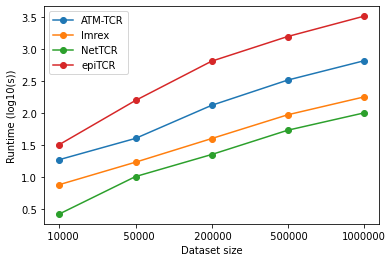

In [48]:
plt.plot(tmp_dataset['count_sample'], tmp_dataset['ATM-TCR_log'],  label='ATM-TCR', marker='o')
plt.plot(tmp_dataset['count_sample'], tmp_dataset['Imrex_log'], label='Imrex', marker='o')
plt.plot(tmp_dataset['count_sample'], tmp_dataset['NetTCR_log'],  label='NetTCR', marker='o')
plt.plot(tmp_dataset['count_sample'], tmp_dataset['MlibTCR_log'], label='epiTCR', marker='o')

plt.xlabel('Dataset size')
plt.ylabel('Runtime (log10(s))')
plt.legend()
plt.savefig("../../analysis/figures/benchmark_runiing_time.png")
plt.savefig("../../analysis/figures/benchmark_runiing_time.pdf")
plt.show()

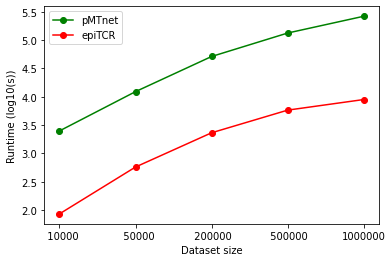

In [49]:
import matplotlib.pyplot as plt

# Plot a simple line chart
plt.plot(tmp_dataset['count_sample'], tmp_dataset['pMTnet_log'],   color='g', label='pMTnet', marker='o')
plt.plot(tmp_dataset['count_sample'], tmp_dataset['MLibTCR_mhc_log'], color='r', label='epiTCR', marker='o')

plt.xlabel('Dataset size')
plt.ylabel('Runtime (log10(s))')
plt.legend()
plt.savefig('../../analysis/figures/benchmark_runiing_time_mhc.png')
plt.savefig('../../analysis/figures/benchmark_runiing_time_mhc.pdf')
plt.show()